# Feature Engineering with PySpark

## Exploratory Data Analysis

In [1]:
import pyspark as sp

In [2]:
sp.version

<module 'pyspark.version' from '/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/pyspark/version.py'>

In [3]:
import sys
print(sys.version_info)

sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)


In [4]:
sys.version

'3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

In [5]:
import os
os.environ["JAVA_HOME"] = "/Library/Java/JavaVirtualMachines/jdk1.8.0_151.jdk/Contents/Home"

In [6]:
sc = sp.SparkContext.getOrCreate()

In [7]:
sc.version

'2.4.0'

In [8]:
# spark session
# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession 

# Create a session as spark 
spark = SparkSession.builder.getOrCreate()

In [9]:
df = spark.read.csv('2017_StPaul_MN_Real_Estate.csv', header=True)
df.columns

['No.',
 'MLSID',
 'StreetNumberNumeric',
 'streetaddress',
 'STREETNAME',
 'PostalCode',
 'StateOrProvince',
 'City',
 'SalesClosePrice',
 'LISTDATE',
 'LISTPRICE',
 'LISTTYPE',
 'OriginalListPrice',
 'PricePerTSFT',
 'FOUNDATIONSIZE',
 'FENCE',
 'MapLetter',
 'LotSizeDimensions',
 'SchoolDistrictNumber',
 'DAYSONMARKET',
 'offmarketdate',
 'Fireplaces',
 'RoomArea4',
 'roomtype',
 'ROOF',
 'RoomFloor4',
 'PotentialShortSale',
 'PoolDescription',
 'PDOM',
 'GarageDescription',
 'SQFTABOVEGROUND',
 'Taxes',
 'RoomFloor1',
 'RoomArea1',
 'TAXWITHASSESSMENTS',
 'TAXYEAR',
 'LivingArea',
 'UNITNUMBER',
 'YEARBUILT',
 'ZONING',
 'STYLE',
 'ACRES',
 'CoolingDescription',
 'APPLIANCES',
 'backonmarketdate',
 'ROOMFAMILYCHAR',
 'RoomArea3',
 'EXTERIOR',
 'RoomFloor3',
 'RoomFloor2',
 'RoomArea2',
 'DiningRoomDescription',
 'BASEMENT',
 'BathsFull',
 'BathsHalf',
 'BATHQUARTER',
 'BATHSTHREEQUARTER',
 'Class',
 'BATHSTOTAL',
 'BATHDESC',
 'RoomArea5',
 'RoomFloor5',
 'RoomArea6',
 'RoomFloor6'

In [10]:
df.count()

5000

In [11]:
df.dtypes

[('No.', 'string'),
 ('MLSID', 'string'),
 ('StreetNumberNumeric', 'string'),
 ('streetaddress', 'string'),
 ('STREETNAME', 'string'),
 ('PostalCode', 'string'),
 ('StateOrProvince', 'string'),
 ('City', 'string'),
 ('SalesClosePrice', 'string'),
 ('LISTDATE', 'string'),
 ('LISTPRICE', 'string'),
 ('LISTTYPE', 'string'),
 ('OriginalListPrice', 'string'),
 ('PricePerTSFT', 'string'),
 ('FOUNDATIONSIZE', 'string'),
 ('FENCE', 'string'),
 ('MapLetter', 'string'),
 ('LotSizeDimensions', 'string'),
 ('SchoolDistrictNumber', 'string'),
 ('DAYSONMARKET', 'string'),
 ('offmarketdate', 'string'),
 ('Fireplaces', 'string'),
 ('RoomArea4', 'string'),
 ('roomtype', 'string'),
 ('ROOF', 'string'),
 ('RoomFloor4', 'string'),
 ('PotentialShortSale', 'string'),
 ('PoolDescription', 'string'),
 ('PDOM', 'string'),
 ('GarageDescription', 'string'),
 ('SQFTABOVEGROUND', 'string'),
 ('Taxes', 'string'),
 ('RoomFloor1', 'string'),
 ('RoomArea1', 'string'),
 ('TAXWITHASSESSMENTS', 'string'),
 ('TAXYEAR', 's

### What are we predicting?

In [12]:
# Select our dependent variable
Y_df = df.select(['SalesClosePrice'])

# Display summary statistics
Y_df.describe().show()

+-------+------------------+
|summary|   SalesClosePrice|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|            100000|
|    max|             99900|
+-------+------------------+



Looks like we need to convert the data type of SalesClosePrice:

In [13]:
# convert the data type of SalesClosePrice to integer
df = df.withColumn("SalesClosePrice", df.SalesClosePrice.cast("integer"))

In [14]:
df.select('SalesClosePrice').describe().show()

+-------+------------------+
|summary|   SalesClosePrice|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|             48000|
|    max|           1700000|
+-------+------------------+



In [15]:
df = df.withColumn("AssessedValuation", df.AssessedValuation.cast("double"))
df = df.withColumn("AssociationFee", df.AssociationFee.cast("bigint"))
df = df.withColumn("SQFTBELOWGROUND", df.SQFTBELOWGROUND.cast("bigint"))

In [16]:
required_dtypes = [('NO', 'bigint'),
 ('MLSID', 'string'),
 ('STREETNUMBERNUMERIC', 'bigint'),
 ('STREETADDRESS', 'string'),
 ('STREETNAME', 'string'),
 ('POSTALCODE', 'bigint'),
 ('STATEORPROVINCE', 'string'),
 ('CITY', 'string'),
 ('SALESCLOSEPRICE', 'bigint'),
 ('LISTDATE', 'string'),
 ('LISTPRICE', 'bigint'),
 ('LISTTYPE', 'string'),
 ('ORIGINALLISTPRICE', 'bigint'),
 ('PRICEPERTSFT', 'double'),
 ('FOUNDATIONSIZE', 'bigint'),
 ('FENCE', 'string'),
 ('MAPLETTER', 'string'),
 ('LOTSIZEDIMENSIONS', 'string'),
 ('SCHOOLDISTRICTNUMBER', 'string'),
 ('DAYSONMARKET', 'bigint'),
 ('OFFMARKETDATE', 'string'),
 ('FIREPLACES', 'bigint'),
 ('ROOMAREA4', 'string'),
 ('ROOMTYPE', 'string'),
 ('ROOF', 'string'),
 ('ROOMFLOOR4', 'string'),
 ('POTENTIALSHORTSALE', 'string'),
 ('POOLDESCRIPTION', 'string'),
 ('PDOM', 'bigint'),
 ('GARAGEDESCRIPTION', 'string'),
 ('SQFTABOVEGROUND', 'bigint'),
 ('TAXES', 'bigint'),
 ('ROOMFLOOR1', 'string'),
 ('ROOMAREA1', 'string'),
 ('TAXWITHASSESSMENTS', 'double'),
 ('TAXYEAR', 'bigint'),
 ('LIVINGAREA', 'bigint'),
 ('UNITNUMBER', 'string'),
 ('YEARBUILT', 'bigint'),
 ('ZONING', 'string'),
 ('STYLE', 'string'),
 ('ACRES', 'double'),
 ('COOLINGDESCRIPTION', 'string'),
 ('APPLIANCES', 'string'),
 ('BACKONMARKETDATE', 'double'),
 ('ROOMFAMILYCHAR', 'string'),
 ('ROOMAREA3', 'string'),
 ('EXTERIOR', 'string'),
 ('ROOMFLOOR3', 'string'),
 ('ROOMFLOOR2', 'string'),
 ('ROOMAREA2', 'string'),
 ('DININGROOMDESCRIPTION', 'string'),
 ('BASEMENT', 'string'),
 ('BATHSFULL', 'bigint'),
 ('BATHSHALF', 'bigint'),
 ('BATHQUARTER', 'bigint'),
 ('BATHSTHREEQUARTER', 'double'),
 ('CLASS', 'string'),
 ('BATHSTOTAL', 'bigint'),
 ('BATHDESC', 'string'),
 ('ROOMAREA5', 'string'),
 ('ROOMFLOOR5', 'string'),
 ('ROOMAREA6', 'string'),
 ('ROOMFLOOR6', 'string'),
 ('ROOMAREA7', 'string'),
 ('ROOMFLOOR7', 'string'),
 ('ROOMAREA8', 'string'),
 ('ROOMFLOOR8', 'string'),
 ('BEDROOMS', 'bigint'),
 ('SQFTBELOWGROUND', 'bigint'),
 ('ASSUMABLEMORTGAGE', 'string'),
 ('ASSOCIATIONFEE', 'bigint'),
 ('ASSESSMENTPENDING', 'string'),
 ('ASSESSEDVALUATION', 'double')]

In [17]:
old_columns = df.columns

In [18]:
new_columns = [c for c, d in required_dtypes]

In [19]:
for n, o in zip(new_columns, old_columns): 
    df = df.withColumnRenamed(o, n)

### Verifying Data Load

In [20]:
def check_load(df, num_records, num_columns):
    # Takes a dataframe and compares record and column counts to input
    # Message to return if the critera below aren't met
    message = 'Validation Failed'
    # Check number of records
    if num_records == df.count():
        # Check number of columns
        if num_columns == len(df.columns):
          # Success message
          message = 'Validation Passed'
    return message

# Print the data validation message
print(check_load(df, 5000, 74))

Validation Passed


### Verifying DataTypes

In [21]:
validation_dict = {'ASSESSMENTPENDING': 'string',
 'ASSESSEDVALUATION': 'double',
 'ASSOCIATIONFEE': 'bigint',
 'ASSUMABLEMORTGAGE': 'string',
 'SQFTBELOWGROUND': 'bigint'}

In [22]:
# create list of actual dtypes to check
actual_dtypes_list = df.dtypes

# Iterate through the list of actual dtypes tuples
for attribute_tuple in actual_dtypes_list:
  
    # Check if column name is dictionary of expected dtypes
    col_name = attribute_tuple[0]
    if col_name in validation_dict:

        # Compare attribute types
        col_type = attribute_tuple[1]
        if col_type == validation_dict[col_name]:
            print(col_name + ' has expected dtype.')

SQFTBELOWGROUND has expected dtype.
ASSUMABLEMORTGAGE has expected dtype.
ASSOCIATIONFEE has expected dtype.
ASSESSMENTPENDING has expected dtype.
ASSESSEDVALUATION has expected dtype.


### Using `Corr()`

In [23]:
for required_type, current_column in zip(required_dtypes, df.columns):
    # since the required and current column names are the exact order we can do:
    if required_type[1] != 'string':
#         df = df.withColumn("{:}".format(current_column), df["`{:}`".format(current_column)].cast(req[1]))
        df = df.withColumn(current_column, df["{:}".format(current_column)].cast(required_type[1]))

In [24]:
check_columns = ['FOUNDATIONSIZE',
 'DAYSONMARKET',
 'FIREPLACES',
 'PDOM',
 'SQFTABOVEGROUND',
 'TAXES',
 'TAXWITHASSESSMENTS',
 'TAXYEAR',
 'LIVINGAREA',
 'YEARBUILT',
 'ACRES',
 'BACKONMARKETDATE',
 'BATHSFULL',
 'BATHSHALF',
 'BATHQUARTER',
 'BATHSTHREEQUARTER',
 'BATHSTOTAL',
 'BEDROOMS',
 'SQFTBELOWGROUND',
 'ASSOCIATIONFEE',
 'ASSESSEDVALUATION']

In [25]:
# Name and value of col with max corr
corr_max = 0
corr_max_col = check_columns[0]

# Loop to check all columns contained in list
for col in check_columns:
    # Check the correlation of a pair of columns
    corr_val = df.corr(col, 'SALESCLOSEPRICE')
    # Logic to compare corr_max with current corr_val
    if corr_val > corr_max:
        # Update the column name and corr value
        corr_max = corr_val
        corr_max_col = col

print(corr_max_col)

LIVINGAREA


### Using Visualizations: distplot

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

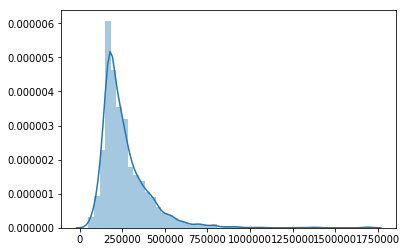

[Row(skewness(LISTPRICE)=2.790448093916559)]


In [29]:
# Select a single column and sample and convert to pandas
# sample 50% and not use replacement and setting the random seed to 42.
sample_df = df.select(['LISTPRICE']).sample(False, .5, 42)
pandas_df = sample_df.toPandas()

# Plot distribution of pandas_df and display plot
sns.distplot(pandas_df)
plt.show()

# Import skewness function
from pyspark.sql.functions import skewness

# Compute and print skewness of LISTPRICE
print(df.agg({'LISTPRICE': 'skewness'}).collect())

We can use the skewness function to verify this numerically rather than visually.

### Using Visualizations: lmplot

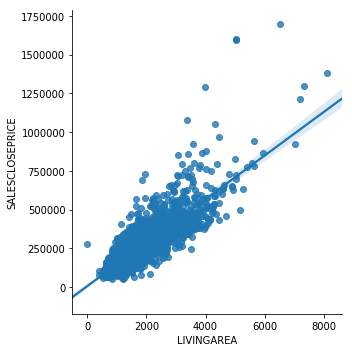

In [30]:
# Select a the relevant columns and sample
sample_df = df.select(['SALESCLOSEPRICE','LIVINGAREA']).sample(False, .5, 42)

# Convert to pandas dataframe
pandas_df = sample_df.toPandas()

# Linear model plot of pandas_df
sns.lmplot(x='LIVINGAREA', y='SALESCLOSEPRICE', data=pandas_df)

we can see that as LivingArea increases, the price of the home increases at a relatively steady rate

## Wrangling with Spark Functions

### Dropping a list of columns

In [31]:
# List of columns to remove from dataset
cols_to_drop = ['STREETNUMBERNUMERIC', 'LOTSIZEDIMENSIONS']

# Drop columns in list
df = df.drop(*cols_to_drop)

We can always come back to these after our intial model if we need more information.

### Using text filters to remove records

In [32]:
# Inspect unique values in the column 'ASSUMABLEMORTGAGE'
df.select(['ASSUMABLEMORTGAGE']).distinct().show()

# List of possible values containing 'yes'
yes_values = ['Yes w/ Qualifying', 'Yes w/No Qualifying']

# Filter the text values out of df but keep null values
text_filter = ~df['ASSUMABLEMORTGAGE'].isin(yes_values) | df['ASSUMABLEMORTGAGE'].isNull()
df = df.where(text_filter)

# Print count of remaining records
print(df.count())

+-------------------+
|  ASSUMABLEMORTGAGE|
+-------------------+
|  Yes w/ Qualifying|
| Information Coming|
|               null|
|Yes w/No Qualifying|
|      Not Assumable|
+-------------------+

4976


### Filtering numeric fields conditionally

In [33]:
from pyspark.sql.functions import log

df = df.withColumn('log_SalesClosePrice', log('SalesClosePrice'))

In [34]:
from pyspark.sql.functions import mean, stddev

# Calculate values used for outlier filtering
mean_val = df.agg({'log_SalesClosePrice': 'mean'}).collect()[0][0]
stddev_val = df.agg({'log_SalesClosePrice': 'stddev'}).collect()[0][0]

# Create three standard deviation (μ ± 3σ) lower and upper bounds for data
low_bound = mean_val - (3 * stddev_val)
hi_bound = mean_val + (3 * stddev_val)

# Filter the data to fit between the lower and upper bounds
df = df.where((df['log_SalesClosePrice'] < hi_bound) & (df['log_SalesClosePrice'] > low_bound))

### Custom Percentage Scaling

In [36]:
from pyspark.sql.functions import round

In [37]:
# Define max and min values and collect them
max_days = df.agg({'DAYSONMARKET': 'max'}).collect()[0][0]
min_days = df.agg({'DAYSONMARKET': 'min'}).collect()[0][0]

# Create a new column based off the scaled data
df = df.withColumn('percentage_scaled_days', 
                  round((df['DAYSONMARKET'] - min_days) / (max_days - min_days)) * 100)

# Calc max and min for new column
print(df.agg({'percentage_scaled_days': 'max'}).collect())
print(df.agg({'percentage_scaled_days': 'min'}).collect())

[Row(max(percentage_scaled_days)=100.0)]
[Row(min(percentage_scaled_days)=0.0)]


### Scaling your scalers

In [38]:
def min_max_scaler(df, cols_to_scale):
    # Takes a dataframe and list of columns to minmax scale. Returns a dataframe.
    for col in cols_to_scale:
        # Define min and max values and collect them
        max_days = df.agg({col: 'max'}).collect()[0][0]
        min_days = df.agg({col: 'min'}).collect()[0][0]
        new_column_name = 'scaled_' + col
        # Create a new column based off the scaled data
        df = df.withColumn(new_column_name, 
                          (df[col] - min_days) / (max_days - min_days))
    return df
  
df = min_max_scaler(df, ['FOUNDATIONSIZE', 'DAYSONMARKET', 'FIREPLACES'])
# Show that our data is now between 0 and 1
df[['DAYSONMARKET', 'scaled_DAYSONMARKET']].show()

+------------+--------------------+
|DAYSONMARKET| scaled_DAYSONMARKET|
+------------+--------------------+
|          10|0.044444444444444446|
|           4|0.017777777777777778|
|          28| 0.12444444444444444|
|          19| 0.08444444444444445|
|          21| 0.09333333333333334|
|          17| 0.07555555555555556|
|          32| 0.14222222222222222|
|           5|0.022222222222222223|
|          23| 0.10222222222222223|
|          73|  0.3244444444444444|
|          80| 0.35555555555555557|
|          79|  0.3511111111111111|
|          12| 0.05333333333333334|
|           1|0.004444444444444...|
|          18|                0.08|
|           2|0.008888888888888889|
|          12| 0.05333333333333334|
|          45|                 0.2|
|          31| 0.13777777777777778|
|          16| 0.07111111111111111|
+------------+--------------------+
only showing top 20 rows



### Correcting Right Skew Data

In [39]:
# Compute the skewness
print(df.agg({'YEARBUILT': 'skewness'}).collect())

# Calculate the max year
max_year = df.agg({'YEARBUILT': 'max'}).collect()[0][0]

# Create a new column of reflected data
df = df.withColumn('Reflect_YearBuilt', (max_year + 1) - df['YEARBUILT'])

# Create a new column based reflected data
df = df.withColumn('adj_yearbuilt', 1 / log(df['Reflect_YearBuilt']))

[Row(skewness(YEARBUILT)=-0.25317374723020336)]


What you've seen here are only a few of the ways that you might try to make your data fit a normal distribution.

### Visualizing Missing Data

In [42]:
columns = ['APPLIANCES',
 'BACKONMARKETDATE',
 'ROOMFAMILYCHAR',
 'BASEMENT',
 'DININGROOMDESCRIPTION']

In [43]:
df.select(columns).show()

+--------------------+----------------+--------------------+--------------------+---------------------+
|          APPLIANCES|BACKONMARKETDATE|      ROOMFAMILYCHAR|            BASEMENT|DININGROOMDESCRIPTION|
+--------------------+----------------+--------------------+--------------------+---------------------+
|Range, Dishwasher...|            null|                null|                Full|       Eat In Kitchen|
|Range, Microwave,...|            null|         Lower Level|Full, Partial Fin...| Informal Dining R...|
|Range, Microwave,...|            null|                null|Full, Crawl Space...| Informal Dining Room|
|Range, Washer, Dryer|            null|          Main Level|Full, Partial Fin...|                 null|
|Range, Exhaust Fa...|            null|         Lower Level|Walkout, Full, Fi...| Breakfast Area, K...|
|Range, Microwave,...|            null|                null|Full, Sump Pump, ...| Separate/Formal D...|
|Range, Microwave,...|            null|                Loft|    

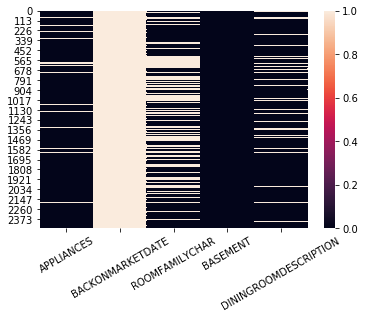

'BACKONMARKETDATE'

In [44]:
# Sample the dataframe and convert to Pandas
sample_df = df.select(columns).sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()

# Convert all values to T/F
tf_df = pandas_df.isnull()

# Plot it
sns.heatmap(data=tf_df)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

# Set the answer to the column with the most missing data
answer = 'BACKONMARKETDATE'
answer

### Imputing Missing Data

In [40]:
# Count missing rows
missing = df.where(df['PDOM'].isNull()).count()

# Calculate the mean value
col_mean = df.agg({'PDOM': 'mean'}).collect()[0][0]

# Replacing with the mean value for that column
df.fillna(col_mean, subset=['PDOM'])

DataFrame[NO: bigint, MLSID: string, STREETADDRESS: string, STREETNAME: string, POSTALCODE: bigint, STATEORPROVINCE: string, CITY: string, SALESCLOSEPRICE: bigint, LISTDATE: string, LISTPRICE: bigint, LISTTYPE: string, ORIGINALLISTPRICE: bigint, PRICEPERTSFT: double, FOUNDATIONSIZE: bigint, FENCE: string, MAPLETTER: string, SCHOOLDISTRICTNUMBER: string, DAYSONMARKET: bigint, OFFMARKETDATE: string, FIREPLACES: bigint, ROOMAREA4: string, ROOMTYPE: string, ROOF: string, ROOMFLOOR4: string, POTENTIALSHORTSALE: string, POOLDESCRIPTION: string, PDOM: bigint, GARAGEDESCRIPTION: string, SQFTABOVEGROUND: bigint, TAXES: bigint, ROOMFLOOR1: string, ROOMAREA1: string, TAXWITHASSESSMENTS: double, TAXYEAR: bigint, LIVINGAREA: bigint, UNITNUMBER: string, YEARBUILT: bigint, ZONING: string, STYLE: string, ACRES: double, COOLINGDESCRIPTION: string, APPLIANCES: string, BACKONMARKETDATE: double, ROOMFAMILYCHAR: string, ROOMAREA3: string, EXTERIOR: string, ROOMFLOOR3: string, ROOMFLOOR2: string, ROOMAREA2:

Make sure to spend time considering the appropriate ways to handle missing data in your problems.

### Calculate Missing Percents

In [41]:
def column_dropper(df, threshold):
    # Takes a dataframe and threshold for missing values. Returns a dataframe.
    total_records = df.count()
    for col in df.columns:
    # Calculate the percentage of missing values
        missing = df.where(df[col].isNull()).count()
        missing_percent = missing / total_records
        # Drop column if percent of missing is more than threshold
        if missing_percent > threshold:
            df = df.drop(col)
    return df

# Drop columns that are more than 60% missing
df = column_dropper(df, .6)

### A Dangerous Join

In [ ]:
# Cast data types
walk_df = walk_df.withColumn('longitude', walk_df.longitude.cast('double'))
walk_df = walk_df.withColumn('latitude', walk_df.latitude.cast('double'))

# Round precision
df = df.withColumn('longitude', round(df['longitude'], 5))
df = df.withColumn('latitude', round(df['latitude'], 5))

# Create join condition
condition = [walk_df['latitude'] == df['latitude'], walk_df['longitude'] == df['longitude']]

# Join the dataframes together
join_df = df.join(walk_df, on=condition, how='left')
# Count non-null records from new field
print(join_df.where(~join_df['walkscore'].isNull()).count())

### Spark SQL Join

In [ ]:
# Register dataframes as tables
df.createOrReplaceTempView("df")
walk_df.createOrReplaceTempView("walk_df")

# SQL to join dataframes
join_sql = 	"""
			SELECT 
				*
			FROM df
			LEFT JOIN walk_df
			ON df.longitude = walk_df.longitude
			AND df.latitude = walk_df.latitude
			"""
# Perform sql join
joined_df = spark.sql(join_sql)

### Checking for Bad Joins

In [ ]:
# Join on mismatched keys precision 
wrong_prec_cond = [walk_df['latitude'] == df_orig['latitude'], walk_df['longitude'] == df_orig['longitude']]
wrong_prec_df = df_orig.join(walk_df, on=wrong_prec_cond, how='left')

# Compare bad join to the correct one
print(wrong_prec_df.where(wrong_prec_df['walkscore'].isNull()).count())
print(correct_join_df.where(correct_join_df['walkscore'].isNull()).count())

# Create a join on too few keys
few_keys_cond = [walk_df['longitude'] == df['longitude']]
few_keys_df = df.join(walk_df, on=few_keys_cond, how='left')

# Compare bad join to the correct one
print("Record Count of the Too Few Keys Join Example: " + str(few_keys_df.count()))
print("Record Count of the Correct Join Example: " + str(correct_join_df.count()))

## Feature Engineering

### Differences

In [45]:
# Lot size in square feet
acres_to_sqfeet = 43560
df = df.withColumn('LOT_SIZE_SQFT', df['ACRES'] * acres_to_sqfeet)

# Create new column YARD_SIZE
df = df.withColumn('YARD_SIZE', df['LOT_SIZE_SQFT'] - df['FOUNDATIONSIZE'])

# Corr of ACRES vs SALESCLOSEPRICE
print("Corr of ACRES vs SALESCLOSEPRICE: " + str(df.corr('ACRES', 'SALESCLOSEPRICE')))
# Corr of FOUNDATIONSIZE vs SALESCLOSEPRICE
print("Corr of FOUNDATIONSIZE vs SALESCLOSEPRICE: " + str(df.corr('FOUNDATIONSIZE', 'SALESCLOSEPRICE')))
# Corr of YARD_SIZE vs SALESCLOSEPRICE
print("Corr of YARD_SIZE vs SALESCLOSEPRICE: " + str(df.corr('YARD_SIZE', 'SALESCLOSEPRICE')))

Corr of ACRES vs SALESCLOSEPRICE: 0.2130819260750225
Corr of FOUNDATIONSIZE vs SALESCLOSEPRICE: 0.5976957088401492
Corr of YARD_SIZE vs SALESCLOSEPRICE: 0.20032633979612804


### Ratios

In [46]:
# ASSESSED_TO_LIST
df = df.withColumn('ASSESSED_TO_LIST', df['ASSESSEDVALUATION'] / df['LISTPRICE'])
df[['ASSESSEDVALUATION', 'LISTPRICE', 'ASSESSED_TO_LIST']].show(5)
# TAX_TO_LIST
df = df.withColumn('TAX_TO_LIST', df['TAXES'] / df['LISTPRICE'])
df[['TAX_TO_LIST', 'TAXES', 'LISTPRICE']].show(5)
# BED_TO_BATHS
df = df.withColumn('BED_TO_BATHS', df['BEDROOMS'] / df['BATHSTOTAL'])
df[['BED_TO_BATHS', 'BEDROOMS', 'BATHSTOTAL']].show(5)

+-----------------+---------+----------------+
|ASSESSEDVALUATION|LISTPRICE|ASSESSED_TO_LIST|
+-----------------+---------+----------------+
|              0.0|   139900|             0.0|
|              0.0|   210000|             0.0|
|              0.0|   225000|             0.0|
|              0.0|   230000|             0.0|
|              0.0|   239900|             0.0|
+-----------------+---------+----------------+
only showing top 5 rows

+--------------------+-----+---------+
|         TAX_TO_LIST|TAXES|LISTPRICE|
+--------------------+-----+---------+
|0.013280914939242315| 1858|   139900|
| 0.00780952380952381| 1640|   210000|
|0.010622222222222222| 2390|   225000|
|0.009330434782608695| 2146|   230000|
|0.008378491037932471| 2010|   239900|
+--------------------+-----+---------+
only showing top 5 rows

+------------------+--------+----------+
|      BED_TO_BATHS|BEDROOMS|BATHSTOTAL|
+------------------+--------+----------+
|               1.5|       3|         2|
|1.333333333

### Deeper Features

In [47]:
from scipy import stats

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

+-------+-------------------+
|summary| BATHS_PER_1000SQFT|
+-------+-------------------+
|  count|               4946|
|   mean| 1.4339460530042523|
| stddev| 14.205761576339642|
|    min|0.39123630672926446|
|    max|             1000.0|
+-------+-------------------+



/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


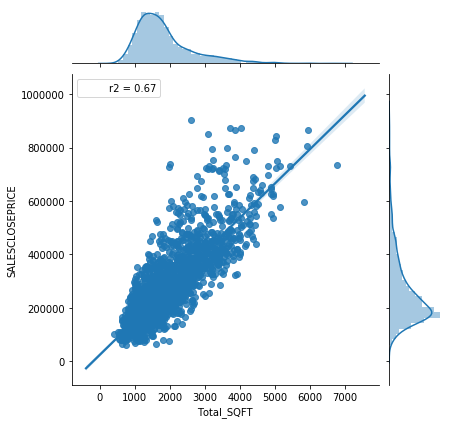

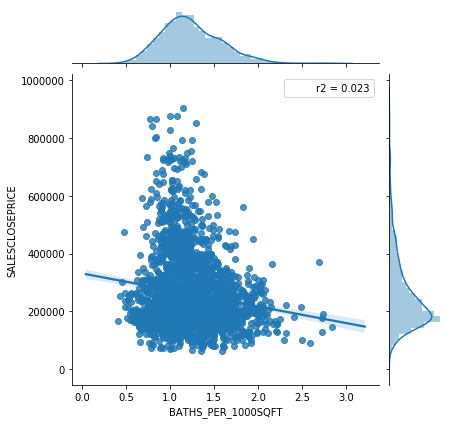

In [48]:
# Create new feature by adding two features together
df = df.withColumn('Total_SQFT', df['SQFTBELOWGROUND'] + df['SQFTABOVEGROUND'])

# Create additional new feature using previously created feature
df = df.withColumn('BATHS_PER_1000SQFT', df['BATHSTOTAL'] / (df['Total_SQFT'] / 1000))
df[['BATHS_PER_1000SQFT']].describe().show()

# Sample and create pandas dataframe
pandas_df = df.sample(False, 0.5, 0).toPandas()

# Linear model plots
sns.jointplot(x='Total_SQFT', y='SALESCLOSEPRICE', data=pandas_df, kind="reg", stat_func=r2)
sns.jointplot(x='BATHS_PER_1000SQFT', y='SALESCLOSEPRICE', data=pandas_df, kind="reg", stat_func=r2)

### Time Components

In [59]:
# Import needed functions
from pyspark.sql.functions import to_date, dayofweek

# Convert to date type
df = df.withColumn('LISTDATE', to_date(df['LISTDATE'], format='MM/dd/yyyy HH:mm'))

# Get the day of the week
df = df.withColumn('List_Day_of_Week', dayofweek(df['LISTDATE']))

# Sample and convert to pandas dataframe
sample_df = df.sample(False, .5, 42).toPandas()

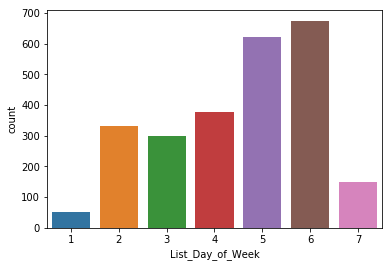

In [61]:
# Plot count plot of of day of week
sns.countplot(x="List_Day_of_Week", data=sample_df)
plt.show()

### Joining On Time Components

In [63]:
import pandas as pd

In [64]:
data = dict(City=['LELM - Lake Elmo', 'MAPW - Maplewood','STP - Saint Paul','WB - Woodbury', \
                  'OAKD - Oakdale', 'LELM - Lake Elmo', 'MAPW - Maplewood', \
                  'STP - Saint Paul', 'WB - Woodbury', 'OAKD - Oakdale'],
     MedianHomeValue=[401000, 193000, 172000, 291000, 210000, 385000, 187000, 162000, 277000, 192000],
     Year= [2016,2016,2016,2016,2016,2015,2015,2015,2015, 2015])

df_price = pd.DataFrame(data)
price_df = spark.createDataFrame(df_price)

In [65]:
price_df.show()

+----------------+---------------+----+
|            City|MedianHomeValue|Year|
+----------------+---------------+----+
|LELM - Lake Elmo|         401000|2016|
|MAPW - Maplewood|         193000|2016|
|STP - Saint Paul|         172000|2016|
|   WB - Woodbury|         291000|2016|
|  OAKD - Oakdale|         210000|2016|
|LELM - Lake Elmo|         385000|2015|
|MAPW - Maplewood|         187000|2015|
|STP - Saint Paul|         162000|2015|
|   WB - Woodbury|         277000|2015|
|  OAKD - Oakdale|         192000|2015|
+----------------+---------------+----+



In [68]:
from pyspark.sql.functions import year

# Create year column
df = df.withColumn('list_year', year(df['LISTDATE']))

# Adjust year to match
df = df.withColumn('report_year', (df['list_year'] - 1))

# Create join condition
condition = [df['CITY'] == price_df['City'], df['report_year'] == price_df['year']]

# Join the dataframes together
df = df.join(price_df, on=condition, how='left')
# Inspect that new columns are available
df[['MedianHomeValue']].show()

+---------------+
|MedianHomeValue|
+---------------+
|         172000|
|         172000|
|         172000|
|         172000|
|         172000|
|         172000|
|         172000|
|         172000|
|         172000|
|         172000|
|         172000|
|         172000|
|         172000|
|         172000|
|         172000|
|         172000|
|         172000|
|         172000|
|         172000|
|         172000|
+---------------+
only showing top 20 rows



### Date Math

In [ ]:
from pyspark.sql.functions import lag, datediff, to_date
from pyspark.sql.window import Window

# Cast data type
mort_df = mort_df.withColumn('DATE', to_date(mort_df['DATE']))

# Create window
w = Window().orderBy(mort_df['DATE'])
# Create lag column
mort_df = mort_df.withColumn('DATE-1', lag(mort_df['DATE'], count=1).over(w))

# Calculate difference between date columns
mort_df = mort_df.withColumn('Days_Between_Report', datediff(mort_df['DATE'], mort_df['DATE-1']))
# Print results
mort_df.select('Days_Between_Report').distinct().show()

### Extracting Text to New Features

In [71]:
# Import needed functions
from pyspark.sql.functions import when

# Create boolean conditions for string matches
has_attached_garage = df['GARAGEDESCRIPTION'].like('%Attached%')
has_detached_garage = df['GARAGEDESCRIPTION'].like('%Detached%')

# Conditional value assignment 
df = df.withColumn('has_attached_garage', (when(has_attached_garage, 1)
                                          .when(has_detached_garage, 0)
                                          .otherwise(None)))

# Inspect results
df[['GARAGEDESCRIPTION', 'has_attached_garage']].show(truncate=100)

+------------------------------------------------------------------------------+-------------------+
|                                                             GARAGEDESCRIPTION|has_attached_garage|
+------------------------------------------------------------------------------+-------------------+
|                                                           Driveway - Concrete|               null|
|                                                             Driveway - Gravel|               null|
|                                                                         Other|               null|
|                                                               Detached Garage|                  0|
|                                                                         Other|               null|
|                                                               Detached Garage|                  0|
|                                                               Detached Garage|           

### Splitting & Exploding

In [75]:
df.select(['GARAGEDESCRIPTION']).show(truncate=100)

+------------------------------------------------------------------------------+
|                                                             GARAGEDESCRIPTION|
+------------------------------------------------------------------------------+
|                                                           Driveway - Concrete|
|                                                             Driveway - Gravel|
|                                                                         Other|
|                                                               Detached Garage|
|                                                                         Other|
|                                                               Detached Garage|
|                                                               Detached Garage|
|                                                                          None|
|                                          Detached Garage, Driveway - Concrete|
|                     Underg

In [72]:
# Import needed functions
from pyspark.sql.functions import split, explode

# Convert string to list-like array
df = df.withColumn('garage_list', split(df['GARAGEDESCRIPTION'], ', '))

# Explode the values into new records
ex_df = df.withColumn('ex_garage_list', explode(df['garage_list']))

# Inspect the values
ex_df[['ex_garage_list']].distinct().show(100, truncate=50)

+----------------------------+
|              ex_garage_list|
+----------------------------+
|             Attached Garage|
|      On-Street Parking Only|
|                        None|
| More Parking Onsite for Fee|
|          Garage Door Opener|
|   No Int Access to Dwelling|
|           Driveway - Gravel|
|       Valet Parking for Fee|
|              Uncovered/Open|
|               Heated Garage|
|          Underground Garage|
|                       Other|
|                  Unassigned|
|More Parking Offsite for Fee|
|    Driveway - Other Surface|
|       Contract Pkg Required|
|                     Carport|
|                     Secured|
|             Detached Garage|
|          Driveway - Asphalt|
|                  Units Vary|
|                    Assigned|
|                   Tuckunder|
|                     Covered|
|            Insulated Garage|
|         Driveway - Concrete|
|                      Tandem|
|           Driveway - Shared|
+----------------------------+



### Pivot & Join

In [ ]:
from pyspark.sql.functions import coalesce, first

# Pivot 
piv_df = ex_df.groupBy('NO').pivot('ex_garage_list').agg(coalesce(first('constant_val')))

# Join the dataframes together and fill null
joined_df = df.join(piv_df, on='NO', how='left')

# Columns to zero fill
zfill_cols = piv_df.columns

# Zero fill the pivoted values
zfilled_df = joined_df.fillna(0, subset=zfill_cols)

### Binarizing Day of Week

In [77]:
df = df.withColumn('List_Day_of_Week', df['List_Day_of_Week'].cast('double'))

In [78]:
# Import transformer
from pyspark.ml.feature import Binarizer

# Create the transformer
binarizer = Binarizer(threshold=5, inputCol='List_Day_of_Week', outputCol='Listed_On_Weekend')

# Apply the transformation to df
df = binarizer.transform(df)

# Verify transformation
df[['List_Day_of_Week', 'Listed_On_Weekend']].show()

+----------------+-----------------+
|List_Day_of_Week|Listed_On_Weekend|
+----------------+-----------------+
|             6.0|              1.0|
|             5.0|              0.0|
|             6.0|              1.0|
|             5.0|              0.0|
|             6.0|              1.0|
|             5.0|              0.0|
|             5.0|              0.0|
|             2.0|              0.0|
|             7.0|              1.0|
|             6.0|              1.0|
|             6.0|              1.0|
|             4.0|              0.0|
|             3.0|              0.0|
|             4.0|              0.0|
|             5.0|              0.0|
|             7.0|              1.0|
|             4.0|              0.0|
|             3.0|              0.0|
|             5.0|              0.0|
|             4.0|              0.0|
+----------------+-----------------+
only showing top 20 rows



### Bucketing

In [82]:
sample_df.head()

,NO,MLSID,STREETNUMBERNUMERIC,STREETADDRESS,STREETNAME,POSTALCODE,STATEORPROVINCE,CITY,SALESCLOSEPRICE,LISTDATE,...,ROOMAREA8,ROOMFLOOR8,BEDROOMS,SQFTBELOWGROUND,ASSUMABLEMORTGAGE,ASSOCIATIONFEE,ASSESSMENTPENDING,ASSESSEDVALUATION,LISTDATER,List_Day_of_Week
0,5,RMLS,2915,2915 Inwood Ave N,Inwood,55042,MN,LELM - Lake Elmo,249900,2017-09-12,...,None,None,3,1026,None,0,No,0.0,2017-09-12,3
1,7,RMLS,9957,9957 5th Street Ln N,5th Street,55042,MN,LELM - Lake Elmo,248000,2017-06-08,...,None,None,3,0,None,200,Yes,3.0,2017-06-08,5
2,8,RMLS,9934,9934 5th Street Ln N,5th Street,55042,MN,LELM - Lake Elmo,245000,2017-11-05,...,None,None,3,0,None,200,No,0.0,2017-11-05,1
3,9,RMLS,9926,9926 5th Street Ln N,5th Street,55042,MN,LELM - Lake Elmo,254990,2017-10-12,...,None,None,3,0,None,200,No,0.0,2017-10-12,5
4,11,RMLS,9902,9902 5th Street Ln N,5th Street,55042,MN,LELM - Lake Elmo,254500,2017-05-19,...,None,None,3,0,None,200,No,0.0,2017-05-19,6


In [85]:
sample_df.BEDROOMS.dtype

dtype('int64')

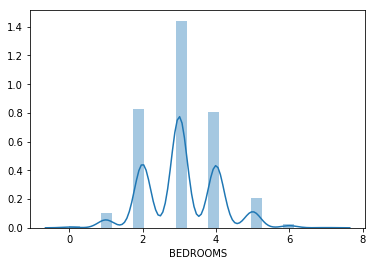

+--------+--------+
|BEDROOMS|bedrooms|
+--------+--------+
|     3.0|     3.0|
|     4.0|     4.0|
|     1.0|     1.0|
|     4.0|     4.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     4.0|     4.0|
|     4.0|     4.0|
|     1.0|     1.0|
|     1.0|     1.0|
|     1.0|     1.0|
|     1.0|     1.0|
|     1.0|     1.0|
|     1.0|     1.0|
|     1.0|     1.0|
|     2.0|     2.0|
|     2.0|     2.0|
|     3.0|     3.0|
|     0.0|     0.0|
|     3.0|     3.0|
+--------+--------+
only showing top 20 rows



In [86]:
from pyspark.ml.feature import Bucketizer

# Plot distribution of sample_df
sns.distplot(sample_df.BEDROOMS, axlabel='BEDROOMS')
plt.show()

# Create the bucket splits and bucketizer
splits = [0, 1, 2, 3, 4, 5, float('Inf')]
buck = Bucketizer(splits=splits, inputCol='BEDROOMS', outputCol='bedrooms')

# Apply the transformation to df
df = buck.transform(df)

# Display results
df[['BEDROOMS', 'bedrooms']].show()

### One Hot Encoding

In [87]:
df.select(['SCHOOLDISTRICTNUMBER']).show()

+--------------------+
|SCHOOLDISTRICTNUMBER|
+--------------------+
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
|      625 - St. Paul|
+--------------------+
only showing top 20 rows



In [88]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

# Map strings to numbers with string indexer
string_indexer = StringIndexer(inputCol='SCHOOLDISTRICTNUMBER', outputCol='School_Index')
indexed_df = string_indexer.fit(df).transform(df)

# Onehot encode indexed values
encoder = OneHotEncoder(inputCol='School_Index', outputCol='School_Vec')
encoded_df = encoder.transform(indexed_df)

# Inspect the transformation steps
encoded_df[['SCHOOLDISTRICTNUMBER', 'School_Index', 'School_Vec']].show(truncate=100)

+--------------------+------------+-------------+
|SCHOOLDISTRICTNUMBER|School_Index|   School_Vec|
+--------------------+------------+-------------+
|      625 - St. Paul|         0.0|(7,[0],[1.0])|
|      625 - St. Paul|         0.0|(7,[0],[1.0])|
|      625 - St. Paul|         0.0|(7,[0],[1.0])|
|      625 - St. Paul|         0.0|(7,[0],[1.0])|
|      625 - St. Paul|         0.0|(7,[0],[1.0])|
|      625 - St. Paul|         0.0|(7,[0],[1.0])|
|      625 - St. Paul|         0.0|(7,[0],[1.0])|
|      625 - St. Paul|         0.0|(7,[0],[1.0])|
|      625 - St. Paul|         0.0|(7,[0],[1.0])|
|      625 - St. Paul|         0.0|(7,[0],[1.0])|
|      625 - St. Paul|         0.0|(7,[0],[1.0])|
|      625 - St. Paul|         0.0|(7,[0],[1.0])|
|      625 - St. Paul|         0.0|(7,[0],[1.0])|
|      625 - St. Paul|         0.0|(7,[0],[1.0])|
|      625 - St. Paul|         0.0|(7,[0],[1.0])|
|      625 - St. Paul|         0.0|(7,[0],[1.0])|
|      625 - St. Paul|         0.0|(7,[0],[1.0])|


notice that the implementation in PySpark is different than Pandas get_dummies() as it puts everything into a single column of type vector rather than a new column for each value. It's also different from sklearn's OneHotEncoder in that the last categorical value is captured by a vector of all zeros

### Building a Model

In [95]:
df.select(['OFFMARKETDATE']).show()

+---------------+
|  OFFMARKETDATE|
+---------------+
|  9/6/2017 0:00|
| 8/12/2017 0:00|
| 10/4/2017 0:00|
| 8/22/2017 0:00|
| 3/27/2017 0:00|
| 8/18/2017 0:00|
| 5/10/2017 0:00|
|  9/2/2017 0:00|
|  9/1/2017 0:00|
| 7/26/2017 0:00|
| 5/18/2017 0:00|
| 9/20/2017 0:00|
| 8/29/2017 0:00|
| 3/29/2017 0:00|
| 3/13/2017 0:00|
|  9/6/2017 0:00|
| 6/25/2017 0:00|
| 9/15/2017 0:00|
| 6/14/2017 0:00|
|11/20/2017 0:00|
+---------------+
only showing top 20 rows



In [96]:
from datetime import timedelta

df = df.withColumn('OFFMARKETDATE', to_date(df['OFFMARKETDATE'], format='MM/dd/yyyy HH:mm'))

In [103]:
def train_test_split_date(df, split_col, test_days=45):
    """Calculate the date to split test and training sets"""
    # Find how many days our data spans
    max_date = df.agg({split_col: 'max'}).collect()[0][0]
    min_date = df.agg({split_col: 'min'}).collect()[0][0]
    # Subtract an integer number of days from the last date in dataset
    split_date = max_date - timedelta(days=test_days)
    return split_date

# Find the date to use in spitting test and train
split_date = train_test_split_date(df, 'OFFMARKETDATE')

# Create Sequential Test and Training Sets
train_df = df.where(df['OFFMARKETDATE'] < split_date) 
test_df = df.where(df['OFFMARKETDATE'] >= split_date).where(df['LISTDATE'] <= split_date) 

In [100]:
split_date

Column<b"to_date('2017-12-10')">

In [98]:
train_df.count(), test_df.count()

(4828, 154)

### Adjusting Time Features

In [105]:
from pyspark.sql.functions import datediff, to_date, lit

split_date = to_date(lit('2017-12-10'))

# Create a copy of DAYSONMARKET to review later
test_df = test_df.withColumn('DAYSONMARKET_Original', test_df['DAYSONMARKET'])

# Recalculate DAYSONMARKET from what we know on our split date
test_df = test_df.withColumn('DAYSONMARKET', datediff(split_date, test_df['LISTDATE']))

# Review the difference
test_df[['LISTDATE', 'OFFMARKETDATE', 'DAYSONMARKET_Original', 'DAYSONMARKET']].show()

+----------+-------------+---------------------+------------+
|  LISTDATE|OFFMARKETDATE|DAYSONMARKET_Original|DAYSONMARKET|
+----------+-------------+---------------------+------------+
|2017-10-07|   2017-12-17|                   71|          64|
|2017-08-14|   2018-01-09|                  114|         118|
|2017-10-24|   2017-12-19|                   56|          47|
|2017-09-21|   2018-01-03|                  100|          80|
|2017-12-08|   2017-12-13|                    4|           2|
|2017-11-03|   2017-12-19|                   46|          37|
|2017-10-14|   2017-12-15|                    6|          57|
|2017-11-27|   2017-12-27|                    3|          13|
|2017-12-10|   2017-12-14|                    4|           0|
|2017-11-14|   2018-01-02|                   49|          26|
|2017-11-21|   2017-12-29|                   38|          19|
|2017-12-08|   2017-12-12|                    4|           2|
|2017-11-13|   2017-12-21|                   38|          27|
|2017-12

if the house is still on the market, we don't know how many more days it will stay on the market. We need to adjust our test_df to reflect what information we currently have as of 2017-12-10.

Missing values are handled by Random Forests internally where they partition on missing values. As long as you replace them with something outside of the range of normal values, they will be handled correctly. Likewise, categorical features only need to be mapped to numbers, they are fine to stay all in one column by using a StringIndexer as we saw in chapter 3. OneHot encoding which converts each possible value to its own boolean feature is not needed.

### Dropping Columns with Low Observations

In [107]:
df.select('FENCE').show()

+--------------------+
|               FENCE|
+--------------------+
|                null|
|                null|
|               Other|
|          Chain Link|
|          Chain Link|
|                None|
|       Wire, Partial|
|                null|
| Chain Link, Partial|
|                null|
|                None|
| Chain Link, Partial|
|                null|
|                null|
|Wood, Chain Link,...|
|          Chain Link|
|                null|
| Chain Link, Partial|
|                None|
|                null|
+--------------------+
only showing top 20 rows



In [106]:
binary_cols = ['FENCE_WIRE',
 'FENCE_ELECTRIC',
 'FENCE_NAN',
 'FENCE_PARTIAL',
 'FENCE_RAIL',
 'FENCE_OTHER',
 'FENCE_CHAIN LINK',
 'FENCE_FULL',
 'FENCE_NONE',
 'FENCE_PRIVACY',
 'FENCE_WOOD',
 'FENCE_INVISIBLE', # e.g. one hot = fence columns 
 'ROOF_ASPHALT SHINGLES',
 'ROOF_SHAKES',
 'ROOF_NAN',
 'ROOF_UNSPECIFIED SHINGLE',
 'ROOF_SLATE',
 'ROOF_PITCHED',
 'ROOF_FLAT',
 'ROOF_TAR/GRAVEL',
 'ROOF_OTHER',
 'ROOF_METAL',
 'ROOF_TILE',
 'ROOF_RUBBER',
 'ROOF_WOOD SHINGLES',
 'ROOF_AGE OVER 8 YEARS',
 'ROOF_AGE 8 YEARS OR LESS',
 'POOLDESCRIPTION_NAN',
 'POOLDESCRIPTION_HEATED',
 'POOLDESCRIPTION_NONE',
 'POOLDESCRIPTION_SHARED',
 'POOLDESCRIPTION_INDOOR',
 'POOLDESCRIPTION_OUTDOOR',
 'POOLDESCRIPTION_ABOVE GROUND',
 'POOLDESCRIPTION_BELOW GROUND',
 'GARAGEDESCRIPTION_ASSIGNED',
 'GARAGEDESCRIPTION_TANDEM',
 'GARAGEDESCRIPTION_UNCOVERED/OPEN',
 'GARAGEDESCRIPTION_TUCKUNDER',
 'GARAGEDESCRIPTION_DRIVEWAY - ASPHALT',
 'GARAGEDESCRIPTION_HEATED GARAGE',
 'GARAGEDESCRIPTION_UNDERGROUND GARAGE',
 'GARAGEDESCRIPTION_DRIVEWAY - SHARED',
 'GARAGEDESCRIPTION_CONTRACT PKG REQUIRED',
 'GARAGEDESCRIPTION_GARAGE DOOR OPENER',
 'GARAGEDESCRIPTION_MORE PARKING OFFSITE FOR FEE',
 'GARAGEDESCRIPTION_VALET PARKING FOR FEE',
 'GARAGEDESCRIPTION_OTHER',
 'GARAGEDESCRIPTION_MORE PARKING ONSITE FOR FEE',
 'GARAGEDESCRIPTION_DRIVEWAY - OTHER SURFACE',
 'GARAGEDESCRIPTION_DETACHED GARAGE',
 'GARAGEDESCRIPTION_SECURED',
 'GARAGEDESCRIPTION_CARPORT',
 'GARAGEDESCRIPTION_DRIVEWAY - CONCRETE',
 'GARAGEDESCRIPTION_ON-STREET PARKING ONLY',
 'GARAGEDESCRIPTION_COVERED',
 'GARAGEDESCRIPTION_INSULATED GARAGE',
 'GARAGEDESCRIPTION_UNASSIGNED',
 'GARAGEDESCRIPTION_NONE',
 'GARAGEDESCRIPTION_DRIVEWAY - GRAVEL',
 'GARAGEDESCRIPTION_NO INT ACCESS TO DWELLING',
 'GARAGEDESCRIPTION_UNITS VARY',
 'GARAGEDESCRIPTION_ATTACHED GARAGE',
 'APPLIANCES_NAN',
 'APPLIANCES_COOKTOP',
 'APPLIANCES_WALL OVEN',
 'APPLIANCES_WATER SOFTENER - OWNED',
 'APPLIANCES_DISPOSAL',
 'APPLIANCES_DISHWASHER',
 'APPLIANCES_OTHER',
 'APPLIANCES_INDOOR GRILL',
 'APPLIANCES_WASHER',
 'APPLIANCES_RANGE',
 'APPLIANCES_REFRIGERATOR',
 'APPLIANCES_FURNACE HUMIDIFIER',
 'APPLIANCES_TANKLESS WATER  HEATER',
 'APPLIANCES_ELECTRONIC AIR FILTER',
 'APPLIANCES_MICROWAVE',
 'APPLIANCES_EXHAUST FAN/HOOD',
 'APPLIANCES_NONE',
 'APPLIANCES_CENTRAL VACUUM',
 'APPLIANCES_TRASH COMPACTOR',
 'APPLIANCES_AIR-TO-AIR EXCHANGER',
 'APPLIANCES_DRYER',
 'APPLIANCES_FREEZER',
 'APPLIANCES_WATER SOFTENER - RENTED',
 'EXTERIOR_SHAKES',
 'EXTERIOR_CEMENT BOARD',
 'EXTERIOR_BLOCK',
 'EXTERIOR_VINYL',
 'EXTERIOR_FIBER BOARD',
 'EXTERIOR_OTHER',
 'EXTERIOR_METAL',
 'EXTERIOR_BRICK/STONE',
 'EXTERIOR_STUCCO',
 'EXTERIOR_ENGINEERED WOOD',
 'EXTERIOR_WOOD',
 'DININGROOMDESCRIPTION_EAT IN KITCHEN',
 'DININGROOMDESCRIPTION_NAN',
 'DININGROOMDESCRIPTION_OTHER',
 'DININGROOMDESCRIPTION_LIVING/DINING ROOM',
 'DININGROOMDESCRIPTION_SEPARATE/FORMAL DINING ROOM',
 'DININGROOMDESCRIPTION_KITCHEN/DINING ROOM',
 'DININGROOMDESCRIPTION_INFORMAL DINING ROOM',
 'DININGROOMDESCRIPTION_BREAKFAST AREA',
 'BASEMENT_FINISHED (LIVABLE)',
 'BASEMENT_PARTIAL',
 'BASEMENT_SUMP PUMP',
 'BASEMENT_INSULATING CONCRETE FORMS',
 'BASEMENT_CRAWL SPACE',
 'BASEMENT_PARTIAL FINISHED',
 'BASEMENT_CONCRETE BLOCK',
 'BASEMENT_DRAINAGE SYSTEM',
 'BASEMENT_POURED CONCRETE',
 'BASEMENT_UNFINISHED',
 'BASEMENT_DRAIN TILED',
 'BASEMENT_WOOD',
 'BASEMENT_FULL',
 'BASEMENT_EGRESS WINDOWS',
 'BASEMENT_DAY/LOOKOUT WINDOWS',
 'BASEMENT_SLAB',
 'BASEMENT_STONE',
 'BASEMENT_NONE',
 'BASEMENT_WALKOUT',
 'BATHDESC_MAIN FLOOR 1/2 BATH',
 'BATHDESC_TWO MASTER BATHS',
 'BATHDESC_MASTER WALK-THRU',
 'BATHDESC_WHIRLPOOL',
 'BATHDESC_NAN',
 'BATHDESC_3/4 BASEMENT',
 'BATHDESC_TWO BASEMENT BATHS',
 'BATHDESC_OTHER',
 'BATHDESC_3/4 MASTER',
 'BATHDESC_MAIN FLOOR 3/4 BATH',
 'BATHDESC_FULL MASTER',
 'BATHDESC_MAIN FLOOR FULL BATH',
 'BATHDESC_WALK-IN SHOWER',
 'BATHDESC_SEPARATE TUB & SHOWER',
 'BATHDESC_FULL BASEMENT',
 'BATHDESC_BASEMENT',
 'BATHDESC_WALK THRU',
 'BATHDESC_BATHROOM ENSUITE',
 'BATHDESC_PRIVATE MASTER',
 'BATHDESC_JACK & JILL 3/4',
 'BATHDESC_UPPER LEVEL 1/2 BATH',
 'BATHDESC_ROUGH IN',
 'BATHDESC_UPPER LEVEL FULL BATH',
 'BATHDESC_1/2 MASTER',
 'BATHDESC_1/2 BASEMENT',
 'BATHDESC_JACK AND JILL',
 'BATHDESC_UPPER LEVEL 3/4 BATH',
 'ZONING_INDUSTRIAL',
 'ZONING_BUSINESS/COMMERCIAL',
 'ZONING_OTHER',
 'ZONING_RESIDENTIAL-SINGLE',
 'ZONING_RESIDENTIAL-MULTI-FAMILY',
 'COOLINGDESCRIPTION_WINDOW',
 'COOLINGDESCRIPTION_WALL',
 'COOLINGDESCRIPTION_DUCTLESS MINI-SPLIT',
 'COOLINGDESCRIPTION_NONE',
 'COOLINGDESCRIPTION_GEOTHERMAL',
 'COOLINGDESCRIPTION_CENTRAL',
 'CITY:LELM - LAKE ELMO',
 'CITY:MAPW - MAPLEWOOD',
 'CITY:OAKD - OAKDALE',
 'CITY:STP - SAINT PAUL',
 'CITY:WB - WOODBURY',
 'LISTTYPE:EXCLUSIVE AGENCY',
 'LISTTYPE:EXCLUSIVE RIGHT',
 'LISTTYPE:EXCLUSIVE RIGHT WITH EXCLUSIONS',
 'LISTTYPE:OTHER',
 'LISTTYPE:SERVICE AGREEMENT',
 'SCHOOLDISTRICTNUMBER:6 - SOUTH ST. PAUL',
 'SCHOOLDISTRICTNUMBER:622 - NORTH ST PAUL-MAPLEWOOD',
 'SCHOOLDISTRICTNUMBER:623 - ROSEVILLE',
 'SCHOOLDISTRICTNUMBER:624 - WHITE BEAR LAKE',
 'SCHOOLDISTRICTNUMBER:625 - ST. PAUL',
 'SCHOOLDISTRICTNUMBER:832 - MAHTOMEDI',
 'SCHOOLDISTRICTNUMBER:833 - SOUTH WASHINGTON COUNTY',
 'SCHOOLDISTRICTNUMBER:834 - STILLWATER',
 'POTENTIALSHORTSALE:NO',
 'POTENTIALSHORTSALE:NOT DISCLOSED',
 'STYLE:(CC) CONVERTED MANSION',
 'STYLE:(CC) HIGH RISE (4+ LEVELS)',
 'STYLE:(CC) LOW RISE (3- LEVELS)',
 'STYLE:(CC) MANOR/VILLAGE',
 'STYLE:(CC) TWO UNIT',
 'STYLE:(SF) FOUR OR MORE LEVEL SPLIT',
 'STYLE:(SF) MODIFIED TWO STORY',
 'STYLE:(SF) MORE THAN TWO STORIES',
 'STYLE:(SF) ONE 1/2 STORIES',
 'STYLE:(SF) ONE STORY',
 'STYLE:(SF) OTHER',
 'STYLE:(SF) SPLIT ENTRY (BI-LEVEL)',
 'STYLE:(SF) THREE LEVEL SPLIT',
 'STYLE:(SF) TWO STORIES',
 'STYLE:(TH) DETACHED',
 'STYLE:(TH) QUAD/4 CORNERS',
 'STYLE:(TH) SIDE X SIDE',
 'STYLE:(TW) TWIN HOME',
 'ASSUMABLEMORTGAGE:INFORMATION COMING',
 'ASSUMABLEMORTGAGE:NOT ASSUMABLE',
 'ASSUMABLEMORTGAGE:YES W/ QUALIFYING',
 'ASSUMABLEMORTGAGE:YES W/NO QUALIFYING',
 'ASSESSMENTPENDING:NO',
 'ASSESSMENTPENDING:UNKNOWN',
 'ASSESSMENTPENDING:YES']

In [114]:
len(binary_cols)

207

In [ ]:
obs_threshold = 30
cols_to_remove = list()
# Inspect first 10 binary columns in list
for col in binary_cols[0:10]:
  # Count the number of 1 values in the binary column
  obs_count = df.agg({col: 'sum'}).collect()[0][0]
  # If less than our observation threshold, remove
  if obs_count < obs_threshold:
    cols_to_remove.append(col)
    
# Drop columns and print starting and ending dataframe shapes
new_df = df.drop(*cols_to_remove)

print('Rows: ' + str(df.count()) + ' Columns: ' + str(len(df.columns)))
print('Rows: ' + str(new_df.count()) + ' Columns: ' + str(len(new_df.columns)))

    Rows: 5000 Columns: 253
    Rows: 5000 Columns: 250

### Naively Handling Missing and Categorical Values

For missing values since our data is strictly positive, we will assign -1. The random forest will split on this value and handle it differently than the rest of the values in the same feature.

In [110]:
categorical_cols = ['CITY', 'LISTTYPE',
'SCHOOLDISTRICTNUMBER',
'POTENTIALSHORTSALE',
'STYLE',
'ASSUMABLEMORTGAGE',
'ASSESSMENTPENDING']

In [112]:
from pyspark.ml import Pipeline

In [ ]:
# Replace missing values
df = df.fillna(-1, subset=['WALKSCORE', 'BIKESCORE'])

# Create list of StringIndexers using list comprehension
indexers = [StringIndexer(inputCol=col, outputCol=col+"_IDX")\
            .setHandleInvalid("keep") for col in categorical_cols]

# Create pipeline of indexers
indexer_pipeline = Pipeline(stages=indexers)
# Fit and Transform the pipeline to the original data
df_indexed = indexer_pipeline.fit(df).transform(df)

# Clean up redundant columns
df_indexed = df_indexed.drop(*categorical_cols)
# Inspect data transformations
print(df_indexed.dtypes)

### Building a Regression Model

In [ ]:
from pyspark.ml.regression import GBTRegressor

# Train a Gradient Boosted Trees (GBT) model.
gbt = GBTRegressor(featuresCol='features',
                           labelCol='SALESCLOSEPRICE',
                           predictionCol="Prediction_Price",
                           seed=42
                           )

# Train model.
model = gbt.fit(train_df)

### Evaluating & Comparing Algorithms

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Select columns to compute test error
evaluator = RegressionEvaluator(labelCol='SALESCLOSEPRICE', 
                                  predictionCol='Prediction_Price')
# Dictionary of model predictions to loop over
models = {'Gradient Boosted Trees': gbt_predictions, 'Random Forest Regression': rfr_predictions}
for key, preds in models.items():
    # Create evaluation metrics
    rmse = evaluator.evaluate(preds, {evaluator.metricName: 'rmse'})
    r2 = evaluator.evaluate(preds, {evaluator.metricName: 'r2'})

    # Print Model Metrics
    print(key + ' RMSE: ' + str(rmse))
    print(key + ' R^2: ' + str(r2))

    Gradient Boosted Trees RMSE: 74380.63652512032
    Gradient Boosted Trees R^2: 0.6482244200795505
    Random Forest Regression RMSE: 22898.84041072095
    Random Forest Regression R^2: 0.9666594402208077

### Interpreting Results

In [ ]:
# Convert feature importances to a pandas column
fi_df = pd.DataFrame(importances, columns=['importance'])

# Convert list of feature names to pandas column
fi_df['feature'] = pd.Series(feature_cols)

# Sort the data based on feature importance
fi_df.sort_values(by=['importance'], ascending=False, inplace=True)

# Inspect Results
fi_df.head(10)

### Saving & Loading Models

In [ ]:
from pyspark.ml.regression import RandomForestRegressionModel

# Save model
model.save('rfr_no_listprice')

# Load model
loaded_model = RandomForestRegressionModel.load('rfr_no_listprice')